In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Correlation_matrix import CorrMtx
# import seaborn as sns

In [4]:
########## SPECIFY DATAFRAME HERE ################################
channel = 0  # ee=0, emu = 1, mumu=2

# channels = ["ee", "emu", "mumu"]

path = "/depot-new/cms/top/zhou907"

file = path + "/" + "ee_modified_root_2_1.csv"

In [54]:
dataframe = pd.read_csv(file)
dataframe = dataframe.drop(['eventWeight'], axis = 1)
dataframe = dataframe.drop(['production_mode'], axis = 1)

In [55]:
dataframe

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass
0,0.196395,0.401817,1.523488,1.100096,0.437924,0.232502,0.889169,0.465777,1.327093,0.903701,...,43.164726,61.223160,55.912968,60.569515,73.736588,85.727631,0.000000e+00,132.345215,86.564339,395.892334
1,0.172882,0.338345,0.095944,2.081524,0.151838,0.663065,0.420664,1.756804,0.268826,1.908642,...,58.718460,57.919064,66.662498,9.865296,86.294891,34.284901,0.000000e+00,91.426224,51.661064,357.865204
2,0.927498,0.191133,3.020247,0.361787,1.366539,2.485170,0.726209,1.932250,2.092748,0.565711,...,43.454281,78.188980,42.291389,70.709892,149.972198,40.723141,1.110223e-16,20.742170,71.965454,568.250061
3,0.180216,0.155463,1.146340,1.088407,1.069548,1.094300,0.103424,2.338171,0.966124,1.268623,...,63.876171,70.141838,59.980759,14.512580,85.544365,48.901600,7.105427e-15,38.919216,31.414345,373.534393
4,1.693352,0.851445,0.393477,0.611020,1.780469,0.764327,0.480594,0.698138,1.299875,1.082331,...,37.103329,51.873825,115.054474,32.219822,140.827530,147.562439,0.000000e+00,167.645020,58.836834,428.166321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814619,0.560937,0.571842,1.540824,0.977205,0.524936,0.535841,1.504823,0.941204,0.979886,0.416268,...,81.831055,150.701614,17.319975,52.204456,42.638184,79.431847,2.842171e-14,63.620266,49.506519,468.926697
814620,0.724043,0.138342,3.696949,0.520334,0.844741,1.707127,2.128164,1.048451,2.972905,0.203709,...,45.463120,119.378471,21.067116,49.610783,40.924866,115.609200,5.684342e-14,37.556633,128.474823,635.448181
814621,1.280565,0.689676,1.869368,0.409543,0.684231,1.275119,0.095428,1.555253,0.588803,0.871022,...,157.176483,92.111130,31.319874,108.905815,122.867226,15.439472,3.552714e-15,104.013481,182.620667,712.447571
814622,0.727869,0.791849,1.661288,0.183191,1.262159,0.257559,1.126999,0.717480,2.389158,0.544678,...,48.212143,100.290535,21.345388,42.599651,78.865273,135.267517,0.000000e+00,65.450943,141.981888,446.921509


In [56]:
corr = dataframe.corr()

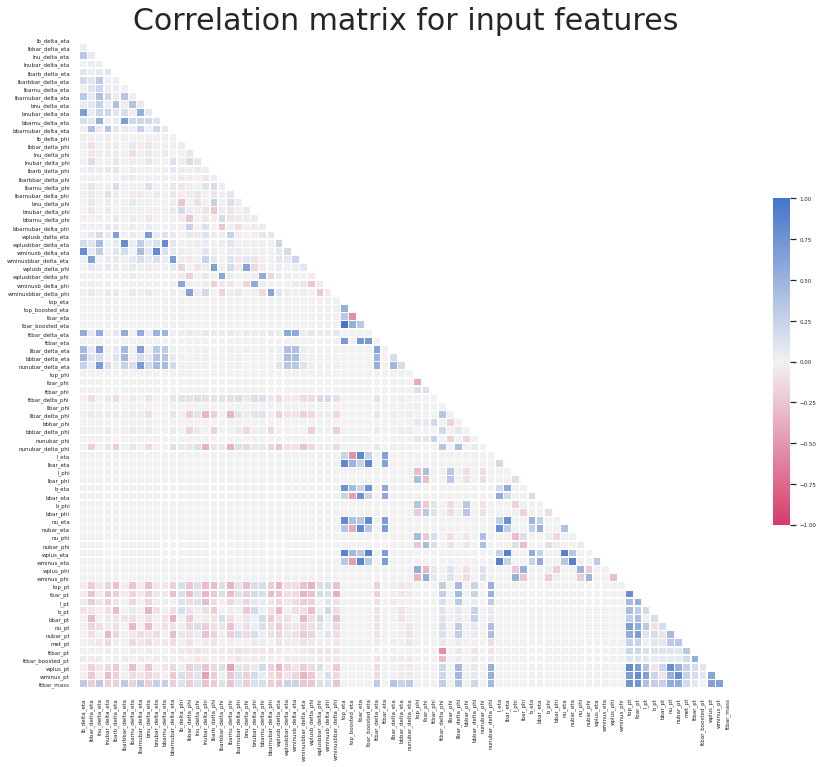

In [57]:
heatmap = CorrMtx(corr, dropDuplicates = True, title = 'corr_matrix_ee')

# Create list of correlated pairs

In [120]:
################ DEFINE CUT HERE ################################
cut = 0.9

In [121]:
# create dataframe with only lower half of values non zero
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_df = np.abs(corr * (~mask))
corr_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,b_pt,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass
lb_delta_eta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbbar_delta_eta,0.030943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnu_delta_eta,0.340966,0.049598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lnubar_delta_eta,0.003232,0.037114,0.020375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
lbarb_delta_eta,0.098538,0.036772,0.067719,0.107455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ttbar_pt,0.000815,0.030505,0.022232,0.045859,0.029388,0.001193,0.047551,0.019713,0.043409,0.012132,...,0.117199,0.120103,0.106419,0.107256,0.323489,0.000000,0.000000,0.000000,0.000000,0.0
ttbar_boosted_pt,0.041781,0.032300,0.039199,0.014751,0.030697,0.042373,0.016038,0.039092,0.025355,0.035423,...,0.060579,0.061950,0.052878,0.055217,0.181189,0.543616,0.000000,0.000000,0.000000,0.0
wplus_pt,0.022028,0.182038,0.072318,0.125514,0.219793,0.015857,0.284112,0.028108,0.235007,0.030810,...,0.071302,0.227623,0.812274,0.520368,0.248559,0.169619,0.086448,0.000000,0.000000,0.0
wminus_pt,0.017673,0.222274,0.028728,0.283681,0.181703,0.022153,0.122951,0.073715,0.149164,0.079629,...,0.228523,0.072956,0.520542,0.811906,0.249971,0.167954,0.087471,0.605493,0.000000,0.0


In [122]:
def find_correlation(corr_df, cut=0.5):
    print(cut)
    correlated_pairs = []

    num_correlated = np.zeros(len(corr_df))

    col_int = 0
    for col in corr_df:
#         print("next iter")
#         print(col)
#         print(type(col))
        row_int = 0
        for row in corr_df.index:
            if abs(corr_df[row][col]) >= cut:
#                 print("in the if")
                correlated_pairs.append((col, row))

                num_correlated[row_int] += 1
                num_correlated[col_int] += 1
#             print("out of the if")
            row_int += 1
#             print(row_int)
        
        col_int += 1
#         print(col_int)
#     print("loop ended")

#     print(correlated_pairs[0])
    corr_df['number_correlated'] = num_correlated
    return corr_df, correlated_pairs

In [123]:
# corr_df = corr_df.drop(['number_correlated'], axis=1)
# corr_df = corr_df.drop(['number_correlated'], axis=0)
corr_df, pairs = find_correlation(corr_df, cut=cut)
sorted_df = corr_df.sort_values(by=['number_correlated'], ascending=False)
sorted_df

0.9


,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,bbar_pt,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,number_correlated
nubar_eta,0.004943,0.002020,0.001443,0.000439,0.000307,0.000159,0.000628,0.001602,0.001260,0.004599,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
tbar_boosted_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
wplus_eta,0.000593,0.001756,0.000333,0.000171,0.004020,0.004327,0.000020,0.001543,0.002367,0.001250,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
wminus_eta,0.005614,0.002775,0.001490,0.001366,0.000340,0.000802,0.000966,0.001651,0.001310,0.004367,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
top_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wplusbbar_delta_eta,0.176247,0.096897,0.428426,0.006895,0.069100,0.812025,0.026030,0.281208,0.071582,0.143395,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
wplusb_delta_eta,0.010036,0.068660,0.163070,0.071499,0.653936,0.015720,0.048059,0.005020,0.683255,0.050749,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
bbarnubar_delta_phi,0.020232,0.021123,0.019120,0.058854,0.074720,0.004150,0.036386,0.000703,0.047010,0.005861,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0
bbarnu_delta_phi,0.017085,0.010406,0.025172,0.011172,0.063802,0.009167,0.053441,0.002128,0.062637,0.000901,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


In [124]:
pairs

[('tbar_boosted_eta', 'top_eta'),
 ('wplus_eta', 'nu_eta'),
 ('wminus_eta', 'nubar_eta')]

# Figure out which parts of pairs to remove:

In [125]:
corr_df['importance'] = np.load("./results/twoLayer_averages.npy")  # get the average importance of each variables    
pairs_df = corr_df[corr_df['number_correlated'] > 0]
pairs_df = pairs_df.sort_values(by=['importance'])
pairs_df

,lb_delta_eta,lbbar_delta_eta,lnu_delta_eta,lnubar_delta_eta,lbarb_delta_eta,lbarbbar_delta_eta,lbarnu_delta_eta,lbarnubar_delta_eta,bnu_delta_eta,bnubar_delta_eta,...,nu_pt,nubar_pt,met_pt,ttbar_pt,ttbar_boosted_pt,wplus_pt,wminus_pt,ttbar_mass,number_correlated,importance
wminus_eta,0.005614,0.002775,0.001490,0.001366,0.000340,0.000802,0.000966,0.001651,0.001310,0.004367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.256635
wplus_eta,0.000593,0.001756,0.000333,0.000171,0.004020,0.004327,0.000020,0.001543,0.002367,0.001250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.256761
nubar_eta,0.004943,0.002020,0.001443,0.000439,0.000307,0.000159,0.000628,0.001602,0.001260,0.004599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272091
nu_eta,0.000190,0.002251,0.000461,0.000073,0.002133,0.003701,0.000719,0.001728,0.003411,0.000977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272634
tbar_boosted_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.341837
top_eta,0.000582,0.001465,0.000527,0.001008,0.003124,0.004736,0.000706,0.001700,0.001575,0.000896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.346791


In [126]:
pairs_df.shape

(6, 82)

In [127]:
removed = []
remaining_pairs = pairs
df = pairs_df
while df.shape[0] > 0:
    remove = df.index[0]
#     print(remove)
    removed.append(remove)
    
    i=0
    while i < len(remaining_pairs):
        if remaining_pairs[i][0] == remove:
            try:
                df = df.drop([remaining_pairs[i][1]], axis = 0)
            except:
                pass
            remaining_pairs.pop(i)
#             print("pop!")
            
        elif remaining_pairs[i][1] == remove:
            try:
                 df = df.drop([remaining_pairs[i][0]], axis = 0)
            except:
                pass
            remaining_pairs.pop(i)
#             print("pop!")
        else:
            i += 1
#         print("i = " + str(i))
            
    df = df.drop([remove], axis = 0)
            
removed

['wminus_eta', 'wplus_eta', 'tbar_boosted_eta']

#### We want to remove everything in removed, so we need to save the list of indexes for them so we can tell dataset_preprocessing not to load them

In [128]:
correlated_indexes = np.array([list(corr_df.index).index(variable) for variable in removed])

In [129]:
correlated_indexes

array([64, 63, 35])

In [130]:
np.save("./results/inputs_to_remove_cut_" + str(cut) + ".npy", correlated_indexes)